Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Performing Data Checks
* Conducting Exploratory Data Analysis
* Pre-Processing the Data
* Training the Model
* Selecting the Best Model

# Hotel Booking Cancellation Prediction

### 1) Problem statement

The goal of project is to optimize room allocations and improve revenue. Efficient room allocation is pivotal as cancellations significantly impact hotel revenue. The project's focus on optimizing room assignments aims to curtail revenue loss associated with cancellations, ensuring that vacant rooms contribute positively to the hotel's financial success. By strategically managing allocations, the initiative seeks to transform potential loss into profit, thus enhancing the overall financial resilience of the hotel.

### 2) Data Collection
Dataset Source : https://www.kaggle.com/datasets/youssefaboelwafa/hotel-booking-cancellation-prediction/data


The data consists of 17 column and 36285 rows.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import  datetime as dt

from sklearn.preprocessing import LabelEncoder

### Load Dataset

In [2]:
file_path = r'D:\MLOPS\ML-Approach-for-Predict-Cancellation-Prevent-Loss-with-MLflow\artifacts\data_ingestion\booking.csv'
df = pd.read_csv(file_path)

In [3]:
display(df.head())
print("size :",df.shape)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


size : (36285, 17)


### Dataset information 

The dataset you provided seems to contain information related to hotel bookings. Let's analyze the features present in the dataset:

Certainly! Here's a brief explanation of each feature:

1. **Booking_ID**: A unique identifier for each booking.
2. **Number of Adults**: The count of adults included in the booking.
3. **Number of Children**: The count of children included in the booking.
4. **Number of Weekend Nights**: The number of nights that fall on a weekend.
5. **Number of Week Nights**: The number of nights that fall on weekdays.
6. **Type of Meal**: The type of meal included in the booking 
7. **Car Parking Space**: Indicates whether a car parking space is included or requested in the booking.
8. **Room Type**: The type of room booked 
9. **Lead Time**: The number of days between the booking date and the arrival date.
10. **Market Segment Type**: The type of market segment associated with the booking 
11. **Repeated**: Indicates whether the booking is a repeat booking.
12. **P-C**: Number of previous bookings canceled by the customer before the current booking.
13. **P-not-C**: Number of previous bookings not canceled by the customer before the current booking.
14. **Average Price**: The average price associated with the booking.
15. **Special Requests**: The number of special requests made by the guest.
16. **Date of Reservation**: The date when the reservation was made.
17. **Booking Status**: The status of the booking (canceled or not canceled).

### Check Missing values

In [125]:
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

There are no missing values in dataset

### Check Duplicates

In [126]:
if df.duplicated().any():
    print("Duplicates found!")
else:
    print("No duplicates found.")

No duplicates found.


There are no duplicates values in the data set

### Check data types

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

### Checking the number of unique values of each column

In [128]:
df.nunique()

Booking_ID                  36285
number of adults                5
number of children              6
number of weekend nights        8
number of week nights          18
type of meal                    4
car parking space               2
room type                       7
lead time                     352
market segment type             5
repeated                        2
P-C                             9
P-not-C                        59
average price                3930
special requests                6
date of reservation           553
booking status                  2
dtype: int64

### Check statistics of data set

#### Numerical Features

In [129]:
df.describe().T.style.background_gradient(cmap='turbo')

,count,mean,std,min,25%,50%,75%,max
number of adults,36285.000000,1.844839,0.518813,0.000000,2.000000,2.000000,2.000000,4.000000
number of children,36285.000000,0.105360,0.402704,0.000000,0.000000,0.000000,0.000000,10.000000
number of weekend nights,36285.000000,0.810693,0.870590,0.000000,0.000000,1.000000,2.000000,7.000000
number of week nights,36285.000000,2.204602,1.410946,0.000000,1.000000,2.000000,3.000000,17.000000
car parking space,36285.000000,0.030977,0.173258,0.000000,0.000000,0.000000,0.000000,1.000000
lead time,36285.000000,85.239851,85.938796,0.000000,17.000000,57.000000,126.000000,443.000000
repeated,36285.000000,0.025630,0.158032,0.000000,0.000000,0.000000,0.000000,1.000000
P-C,36285.000000,0.023343,0.368281,0.000000,0.000000,0.000000,0.000000,13.000000
P-not-C,36285.000000,0.153369,1.753931,0.000000,0.000000,0.000000,0.000000,58.000000
average price,36285.000000,103.421636,35.086469,0.000000,80.300000,99.450000,120.000000,540.000000


#### Categorical Features

In [130]:
df.select_dtypes(exclude=[np.number]).describe().T

,count,unique,top,freq
Booking_ID,36285,36285,INN00001,1
type of meal,36285,4,Meal Plan 1,27842
room type,36285,7,Room_Type 1,28138
market segment type,36285,5,Online,23221
date of reservation,36285,553,10/13/2018,254
booking status,36285,2,Not_Canceled,24396


### Prepraring Data

In [131]:
df["booking status"] = df["booking status"].apply(lambda x : 1 if x=='Not_Canceled' else 0) 

In [132]:
label_encoder = LabelEncoder()

df['type of meal'] = label_encoder.fit_transform(df['type of meal'])
df['room type'] = label_encoder.fit_transform(df['room type'])
df['market segment type'] = label_encoder.fit_transform(df['market segment type'])

In [133]:
df = df[~df["date of reservation"].str.contains("-")]

df['date of reservation'] = pd.to_datetime(df['date of reservation'])
df["month"] = df["date of reservation"].dt.month
df['year'] = df['date of reservation'].dt.year

In [134]:
df.drop(['Booking_ID','date of reservation'], axis=1, inplace=True)

##  Exploratory Data Analysis

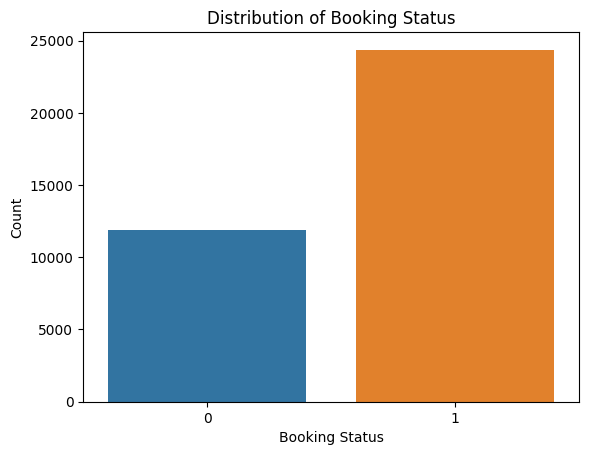

In [135]:
sns.countplot(data=df,x='booking status')
plt.title('Distribution of Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()

* Insights : The dataset exhibits an imbalance in booking status, with a higher count of "Not_Canceled" instances.

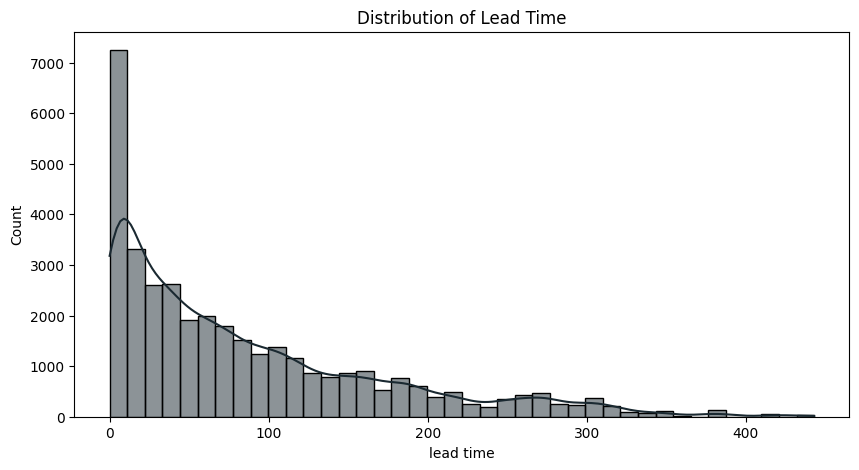

In [136]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='lead time', bins=40, color='#1A2931', kde=True)
plt.title('Distribution of Lead Time')
plt.show()

* Insights : The lead time histogram reveals a right-skewed distribution, indicating that most bookings are made on the day of arrival.

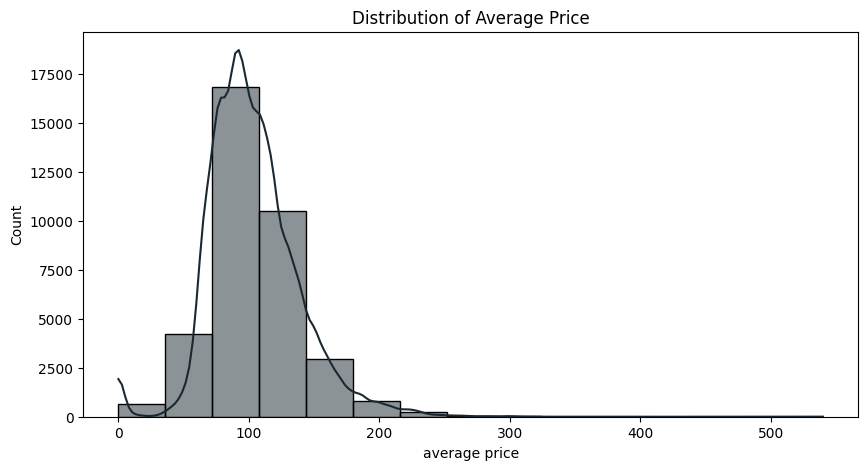

In [137]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='average price', bins=15, color='#1A2931', kde=True)
plt.title('Distribution of Average Price')
plt.show()

Insgihts 
* The average price of hotel bookings around 100.
* The distribution of prices is roughly normal, with most prices falling between 80 and 120, there are a small number of bookings with much higher prices, up to 540.


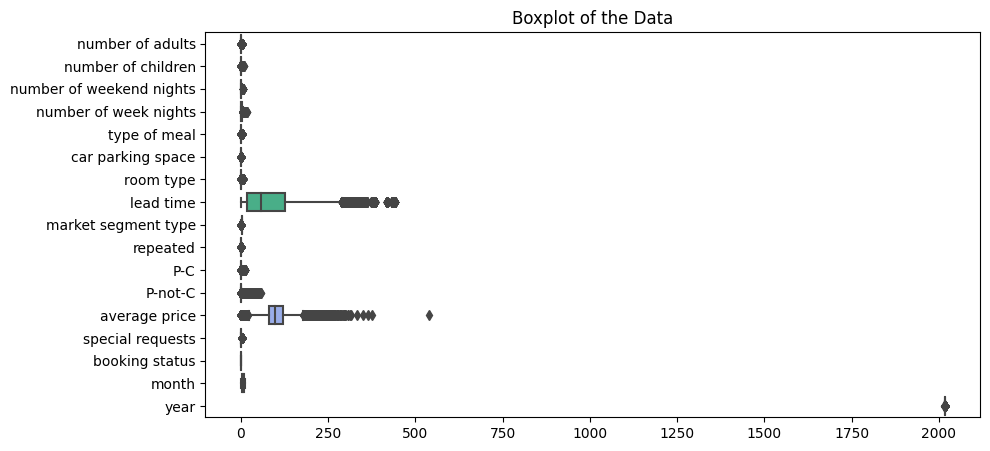

In [138]:
plt.figure(figsize=(10, 5))  
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of the Data')
plt.show()

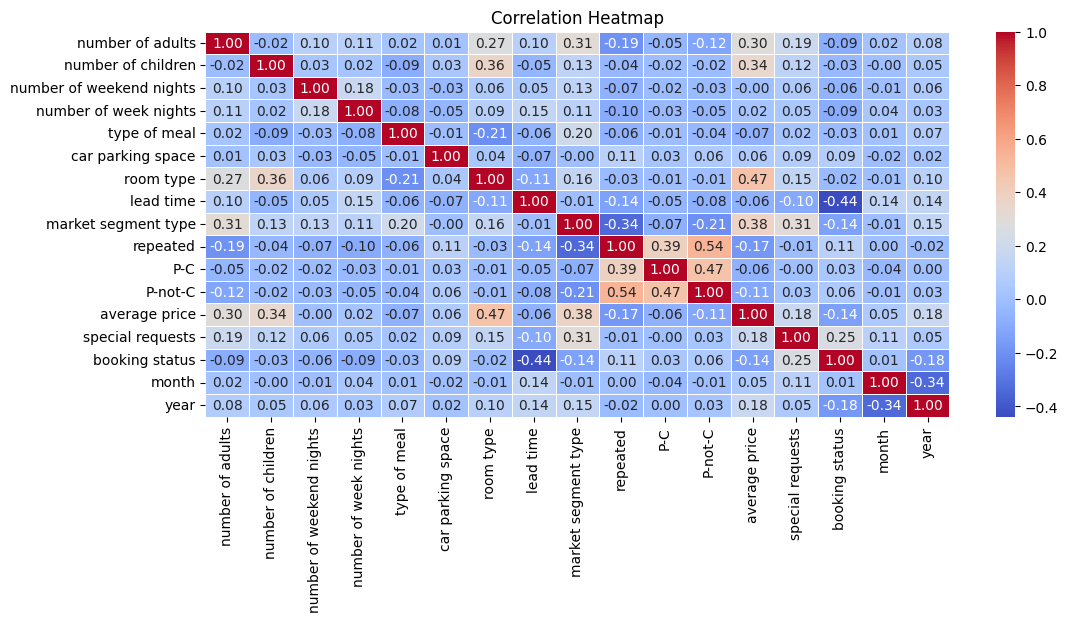

In [139]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Insights 

 *the strongest correlations in the heatmap are*
* repeated : 0.11
* special requests : 0.25 

##### we can confidently consider removing redundant features for a more optimal model.